# Redes Neuronales Convolucionales (CNN) para la clasificación de imágenes

In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

##  Visualización de los datos de las imágenes

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
X_train.shape

(60000, 28, 28)

In [6]:
una_imagen = X_train[0]

In [7]:
una_imagen

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
una_imagen.shape

(28, 28)

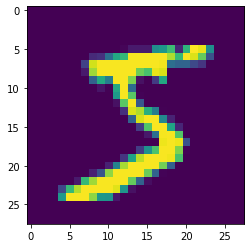

In [9]:
plt.imshow(una_imagen)

¿Qué está pasando acá?   ¿No se supone que es una imagen B-N?

Lo que pasa es que, como ya vimos, Matplotlib tiene una variedd de esquemas de colores "colormaps".  Si así lo deseamos podemos cambiar el esquema para que se vea en B-N

# Pre-procesamiento de los datos

Necesitamos asegurar que las etiquetas sean comprensibles por nuestra CNN

## Etiquetas

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Parece que las etiquetas son literalmente categorías numéricas, pero estábn en formato numérico.  Será necesario convertirlos por el método de "one hot encoding" para que puedan ser usadas por la CNN, de lo contrario pensará que es algún tipo de problema de regresión sobre un eje contínuo.

Afortunadamente, Keras tiene una función fácil para hacer esta conversión:

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [13]:
ejemplo_y = to_categorical(y_train)

In [14]:
ejemplo_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
ejemplo_y.shape

(60000, 10)

In [16]:
ejemplo_y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

el método to_categorical puede inferir, por default, el número de clases...y lo hace bastante bien.  Sin embargo, si queremos estar seguros, o si fuera un caso más complicado, lo podemos especifica.  En este caso son 10

In [19]:
y_cat_test = to_categorical(y_test, 10)

In [20]:
y_cat_train = to_categorical(y_train, 10)

### Procesamiento de los datos X

Es mejor normalizar los datos de X

In [21]:
una_imagen.max()

255

In [22]:
una_imagen.min()

0

In [26]:
X_train = X_train / 255
X_test = X_test / 255

In [27]:
una_escalada = X_train[0]

In [28]:
una_escalada.max()

1.0

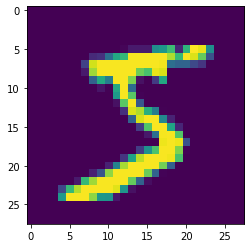

In [29]:
plt.imshow(una_escalada)

Vemos que es exactamente igual!

## Cambiar el formato de los datos

Ahorita los datos son 60,000 imágenes almacenadas en un formato de 20 X 28 pixeles.

Esto es correctp para una CNN, pero necesitamos agregar una dimensión más para mostrar que estamos trabajando con un canal RGB (ya que, técnicamente, las imágenes están en B-N, solo mostrando valores entre 0-255 en un solo canal).  Una imagen a colores tendría 3 canales o dimensiones.

In [30]:
X_train.shape

(60000, 28, 28)

In [31]:
X_test.shape

(10000, 28, 28)

Modificar la forma para incluir la dimensión correspondiente al canal (en este caso es 1)

In [32]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [33]:
X_train.shape

(60000, 28, 28, 1)

In [34]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [35]:
X_test.shape

(10000, 28, 28, 1)

# Entrenamiento del modelo

Importamos para crear capas normales, capas convolucionales, capas de pooling, y necesitaremos una capa para "aplanar" los datos (a una sola dimensión)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [37]:
modelo = Sequential()

### Capa Convolucional

El número de filtros es configurable, generalmente se usa un múltiplo de 2.  El tamaño también es configurable, sin embargo es bueno ajustarlo al tamaño de la imágen.  Cómo el filtro se irá trasladando es bueno que el tamaño de la imagen sea un múltiplo del tamaño del filtro

In [38]:
modelo.add(Conv2D(filters = 32, kernel_size = (4, 4), input_shape = (28, 28, 1), activation = 'relu'))

### Capa de sub-muestreo (Pooling)

In [39]:
modelo.add(MaxPool2D(pool_size = (2, 2)))

### Capa parar aplanar 

Antes de llegar a la capa final es importante "aplanar" de 28 X 28 a 764 

In [40]:
modelo.add(Flatten())

### Capas escondidas

Serán de 128 "neuronas" o unidades (este valor es configurable)

In [41]:
modelo.add(Dense(128, activation = 'relu'))

### La última capa es la clasificadora

Tenemos 10 posibles clases por lo que se usa la función de activación "softmax" que es para multi-clases

In [42]:
modelo.add(Dense(10, activation = 'softmax'))

### Se compila el modelo

Como una opción se pueden pedir una o más métricas, para ver cuáles hay, se puede consultar en:

https://keras.io/metrics/

In [43]:
modelo.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [45]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Uso de "callbacks"

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

## Entrenar el modelo

In [48]:
modelo.fit(X_train, y_cat_train, epochs = 10, validation_data = (X_test,y_cat_test),
           callbacks = [early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 31s 518us/sample - loss: 0.1350 - accuracy: 0.9590 - val_loss: 0.0486 - val_accuracy: 0.9843
Epoch 2/10
60000/60000 [==============================] - 26s 434us/sample - loss: 0.0458 - accuracy: 0.9854 - val_loss: 0.0432 - val_accuracy: 0.9847
Epoch 3/10
60000/60000 [==============================] - 28s 461us/sample - loss: 0.0310 - accuracy: 0.9903 - val_loss: 0.0424 - val_accuracy: 0.9863
Epoch 4/10
60000/60000 [==============================] - 26s 430us/sample - loss: 0.0212 - accuracy: 0.9934 - val_loss: 0.0404 - val_accuracy: 0.9875
Epoch 5/10
60000/60000 [==============================] - 26s 426us/sample - loss: 0.0140 - accuracy: 0.9957 - val_loss: 0.0442 - val_accuracy: 0.9861
Epoch 6/10
60000/60000 [==============================] - 26s 442us/sample - loss: 0.0110 - accuracy: 0.9963 - val_loss: 0.0467 - val_accuracy: 0.9870


## Evaluar el modelo

Para saber qué métricas hay disponibles:

In [49]:
modelo.metrics_names

['loss', 'accuracy']

In [51]:
perdidas = pd.DataFrame(modelo.history.history)

In [52]:
perdidas.head()

,loss,accuracy,val_loss,val_accuracy
0,0.134993,0.959033,0.048591,0.9843
1,0.045849,0.985417,0.043179,0.9847
2,0.030956,0.990333,0.042399,0.9863
3,0.021248,0.993417,0.040383,0.9875
4,0.014026,0.995683,0.044166,0.9861


<AxesSubplot:>

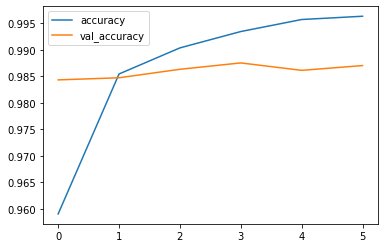

In [53]:
perdidas[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

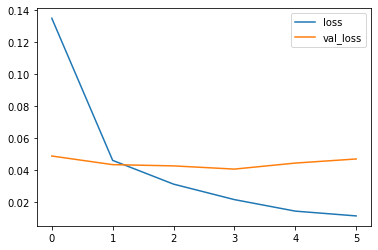

In [54]:
perdidas[['loss', 'val_loss']].plot()

In [55]:
print(modelo.metrics_names)
print(modelo.evaluate(X_test, y_cat_test, verbose = 0))

['loss', 'accuracy']
[0.04673307901539811, 0.987]


In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
predicciones = modelo.predict_classes(X_test)

In [57]:
y_cat_test.shape

(10000, 10)

In [58]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [59]:
predicciones[0]

7

In [60]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [63]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [64]:
confusion_matrix(y_test, predicciones)

array([[ 976,    0,    1,    0,    1,    0,    1,    0,    0,    1],
       [   1, 1131,    1,    1,    0,    0,    0,    1,    0,    0],
       [   2,    2, 1020,    1,    1,    0,    2,    4,    0,    0],
       [   0,    0,    2, 1006,    0,    0,    0,    1,    1,    0],
       [   0,    0,    0,    0,  978,    0,    0,    0,    0,    4],
       [   2,    1,    0,   11,    0,  876,    1,    1,    0,    0],
       [   3,    2,    1,    0,    8,    4,  940,    0,    0,    0],
       [   0,    1,    5,    0,    0,    0,    0, 1018,    2,    2],
       [   5,    1,    5,    3,    1,    1,    1,    3,  952,    2],
       [   2,    2,    2,    4,   16,    3,    0,    7,    0,  973]])

In [65]:
import seaborn as sns

<AxesSubplot:>

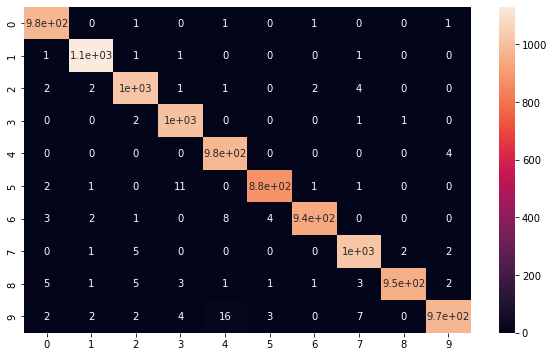

In [66]:
plt.figure(figsize = (10, 6))
sns.heatmap(confusion_matrix(y_test,predicciones),annot = True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predecir una imagen dada

In [68]:
mi_numero = X_test[0]

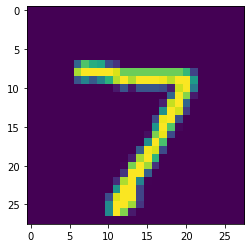

In [69]:
plt.imshow(mi_numero.reshape(28,28))

Recordar que la forma debe ser:  (num_imagenes, ancho, alto, num_canales_color)

In [70]:
modelo.predict_classes(mi_numero.reshape(1,28,28,1))

array([7])

Parece que la CNN funciona bastante bien!